In [1]:
##### Libraries ####
import seaborn as sns
import scipy
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
##### load training dataset ######
data =  pd.read_csv('training_data.csv', delimiter=',')
data[['Resp','PR Seq','RT Seq','VL-t0', 'CD4-t0']].head()

,Resp,PR Seq,RT Seq,VL-t0,CD4-t0
0,0,CCTCAAATCACTCTTTGGCAACGACCCCTCGTCCCAATAAGGATAG...,CCCATTAGTCCTATTGAAACTGTACCAGTAAAGCTAAAGCCAGGAA...,4.3,145
1,0,CCTCAAATCACTCTTTGGCAACGACCCCTCGTCGCAATAAAGATAG...,CCCATTAGTCCTATTGAAACTGTACCAGTAAAATTAAAGCCAGGAA...,3.6,224
2,0,CCTCAAATCACTCTTTGGCAACGACCCCTCGTCGCAATAAAGGTAG...,CCCATTAGTCCTATTGAAACTGTACCAGTAAAATTAAAGCCAGGAA...,3.2,1017
3,0,CCTCAAATCACTCTTTGGCAACGACCCCTCGTCGCAATAAGGATAG...,CCCATTAGTCCTATTGAAACTGTACCAGTAAAATTAAAGCCAGGAA...,5.7,206
4,0,CCTCAAATCACTCTTTGGCAACGACCCCTCGTCGCAGTAAAGATAG...,CCCATTAGTCCTATTGAAACTGTACCAGTAAAATTAAAGCCAGGAA...,3.5,572


In [3]:
#print(data['RT Seq'][0])

In [4]:
####### Number of missing data ########
data.isnull().sum().sum()

80

In [5]:
####### Number of missing data ########
print('Missing data:')
data[['Resp','PR Seq','RT Seq','VL-t0', 'CD4-t0']].isnull().sum()

Missing data:


Resp       0
PR Seq    80
RT Seq     0
VL-t0      0
CD4-t0     0
dtype: int64

In [6]:
data_X = data[['VL-t0', 'CD4-t0']]

In [7]:
# descriptive statistic
data[['Resp','PR Seq','RT Seq','VL-t0', 'CD4-t0']].describe()


,Resp,VL-t0,CD4-t0
count,1000.000000,1000.00000,1000.000000
mean,0.206000,4.29721,279.638000
std,0.404633,0.70478,198.186712
min,0.000000,2.70000,0.000000
25%,0.000000,3.70000,132.750000
50%,0.000000,4.30000,249.000000
75%,0.000000,4.80000,383.250000
max,1.000000,6.00000,1589.000000


In [8]:
################ mean of data_X ############
data_X.mean()

VL-t0       4.29721
CD4-t0    279.63800
dtype: float64

In [9]:
################ covariance matrix of data_X ############
print('Covariance Matrix')
data_X.cov()

Covariance Matrix


,VL-t0,CD4-t0
VL-t0,0.496714,-58.131091
CD4-t0,-58.131091,39277.972929


In [10]:
################ correlation matrix of data_X ############
#data[['VL-t0', 'CD4-t0']].corr()
print('Correlation Matrix')
data_X.corr()

Correlation Matrix


,VL-t0,CD4-t0
VL-t0,1.000000,-0.416179
CD4-t0,-0.416179,1.000000


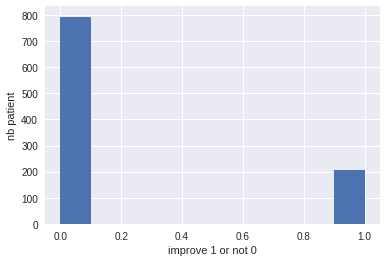

In [11]:
##############  Histogram of improving '1' of responds after 16 weeks of therapy #################
data['Resp'].hist()
plt.ylabel("nb patient")
plt.xlabel("improve 1 or not 0")
plt.savefig('imbalanced_plot')

## Class 0: no improvement

In [12]:
class_0 = data[data['Resp']==0]

In [13]:
class_0_X = class_0[['VL-t0','CD4-t0']]

In [14]:
print('Class 0')
class_0_X.describe()

Class 0


,VL-t0,CD4-t0
count,794.000000,794.000000
mean,4.167179,291.607053
std,0.678766,193.778515
min,2.700000,1.000000
25%,3.600000,142.500000
50%,4.100000,256.500000
75%,4.600000,400.750000
max,6.000000,1219.000000


In [15]:
print('Class 0')
class_0_X.cov()

Class 0


,VL-t0,CD4-t0
VL-t0,0.460723,-59.262724
CD4-t0,-59.262724,37550.112737


In [16]:
print('Class 0')
class_0_X.corr()

Class 0


,VL-t0,CD4-t0
VL-t0,1.000000,-0.450564
CD4-t0,-0.450564,1.000000


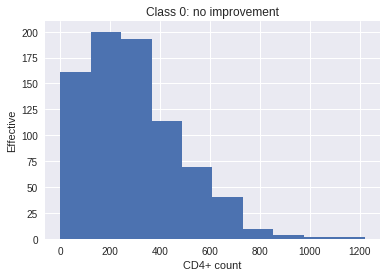

In [17]:
class_0_X['CD4-t0'].hist()
plt.ylabel('Effective')
plt.xlabel('CD4+ count')
plt.title('Class 0: no improvement')
plt.savefig('Class0_origin_data_CD4')

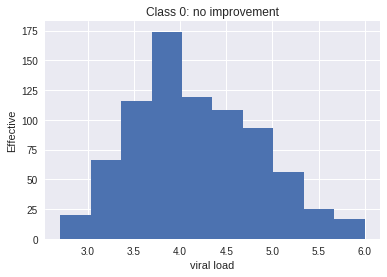

In [18]:
class_0_X['VL-t0'].hist()
plt.ylabel('Effective')
plt.xlabel('viral load')
plt.title('Class 0: no improvement')
plt.savefig('Class0_origin_data_VL')

## Class 1: Improvement

In [19]:
class_1 = data[data['Resp']==1]

In [20]:
class_1_X = class_1[['VL-t0','CD4-t0']]

In [21]:
print('Class 1')
class_1_X.describe()

Class 1


,VL-t0,CD4-t0
count,206.000000,206.000000
mean,4.798398,233.504854
std,0.566092,208.470452
min,2.900000,0.000000
25%,4.400000,87.750000
50%,4.800000,195.500000
75%,5.200000,339.500000
max,5.900000,1589.000000


In [22]:
print('Class 1')
class_1_X.cov()

Class 1


,VL-t0,CD4-t0
VL-t0,0.320460,-24.774992
CD4-t0,-24.774992,43459.929245


In [23]:
print('Class 1')
class_1_X.corr()

Class 1


,VL-t0,CD4-t0
VL-t0,1.000000,-0.209934
CD4-t0,-0.209934,1.000000


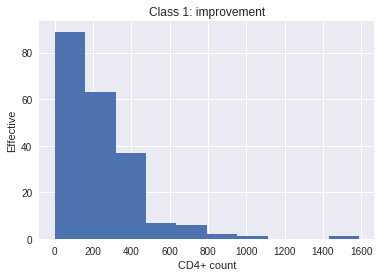

In [24]:
class_1_X['CD4-t0'].hist()
plt.ylabel('Effective')
plt.xlabel('CD4+ count')
plt.title('Class 1: improvement')
plt.savefig('Class0_origin_data_CD4')

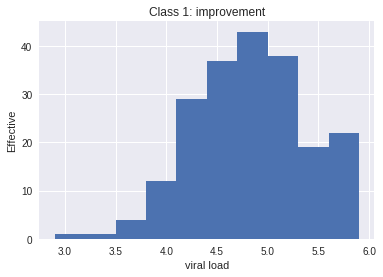

In [25]:
class_1_X['VL-t0'].hist()
plt.ylabel('Effective')
plt.xlabel('viral load')
plt.title('Class 1: improvement')
plt.savefig('Class1_origin_data_VL')

## Plotting

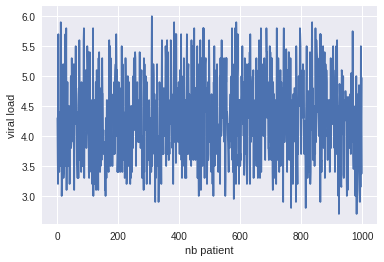

In [26]:
##############  plotting of viral load "VL-t0" #################
data['VL-t0'].plot()
plt.xlabel("nb patient")
plt.ylabel("viral load")

######  save figure, format '.png'
plt.savefig('viral_load_plot.png')

Text(0.5, 0, 'viral load')

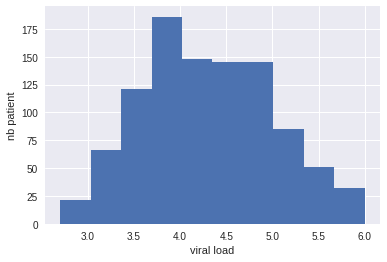

In [27]:
##############  histogramm of viral load "VL-t0" #################
data['VL-t0'].hist()
plt.ylabel("nb patient")
plt.xlabel("viral load")

Text(0, 0.5, 'CD4+ count')

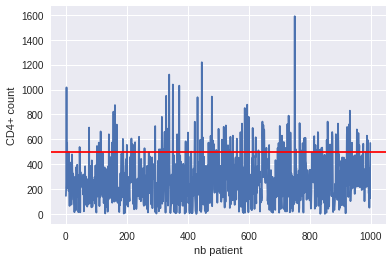

In [28]:
##############  plotting of absolute CD4 count "CD4-t0" #################
data['CD4-t0'].plot()
plt.axhline(500, 0, 1002, color='r')
plt.xlabel("nb patient")
plt.ylabel("CD4+ count")

Text(0.5, 0, 'CD4+ count')

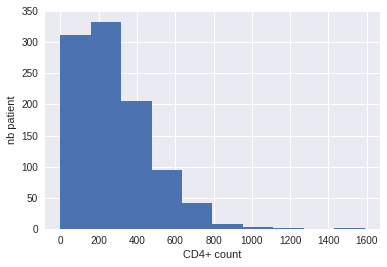

In [29]:
##############  Histogram of absolute CD4 count "CD4-t0" #################
data['CD4-t0'].hist()
plt.ylabel("nb patient")
plt.xlabel("CD4+ count")

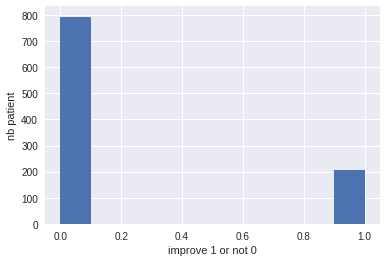

In [30]:
##############  Histogram of improving '1' of responds after 16 weeks of therapy #################
data['Resp'].hist()
plt.ylabel("nb patient")
plt.xlabel("improve 1 or not 0")
plt.savefig('label_plot_imbal.png')
# We have imbalanced data

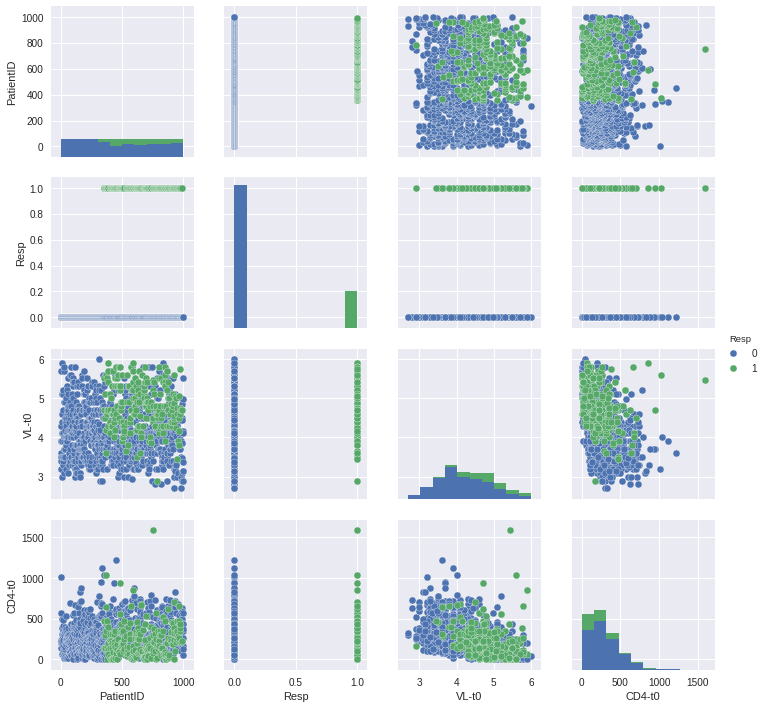

In [31]:
sns.pairplot(data, hue='Resp')